# Congressional Record and Hansard Descriptive Analysis


## Setup


In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

if not os.path.exists(DIST_PATH):
    os.makedirs(DIST_PATH)

plt.style.use('ggplot')
load_dotenv()

party_colours = {
    'Democrat': os.getenv('DEMOCRAT_BLUE'),
    'Republican': os.getenv('REPUBLICAN_RED'),
    'Conservative': os.getenv('CONSERVATIVE_BLUE'),
    'Labour': os.getenv('LABOUR_RED')}

## Time series trends


In [14]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by month


**Climate Congressional Record**


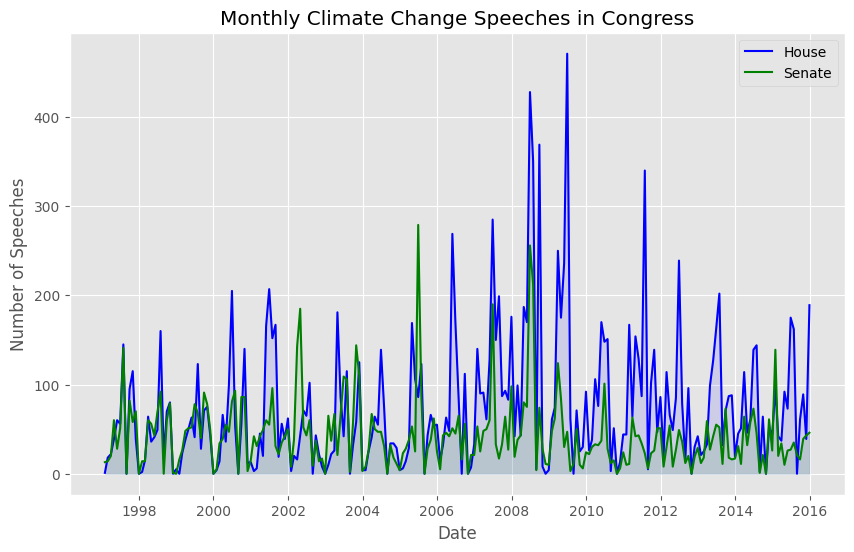

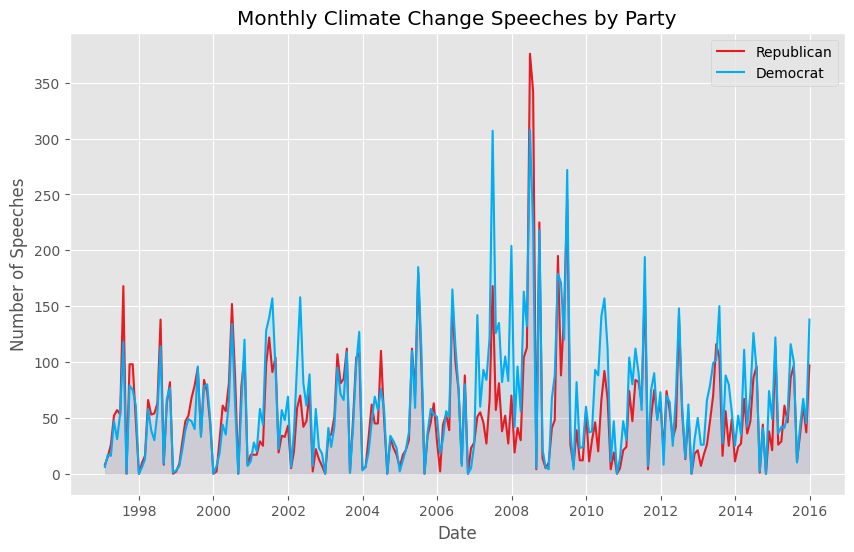

In [15]:
climate_congressional_record['date'] = pd.to_datetime(
    climate_congressional_record['date'])

house_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'H']
senate_speeches = climate_congressional_record[climate_congressional_record['chamber'] == 'S']

republican_speeches = climate_congressional_record[climate_congressional_record['party'] == 'R']
democratic_speeches = climate_congressional_record[climate_congressional_record['party'] == 'D']

monthly_house_speeches = house_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()
monthly_senate_speeches = senate_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()

monthly_republican_speeches = republican_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()
monthly_democratic_speeches = democratic_speeches.groupby(pd.Grouper(
    key='date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_house_speeches, label='House', color='blue')
plt.plot(monthly_senate_speeches, label='Senate', color='green')
plt.fill_between(monthly_house_speeches.index,
                 monthly_house_speeches, color='blue', alpha=0.1)
plt.fill_between(monthly_senate_speeches.index,
                 monthly_senate_speeches, color='green', alpha=0.1)
plt.title('Monthly Climate Change Speeches in Congress')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_republican_speeches, label='Republican',
         color=party_colours['Republican'])
plt.plot(monthly_democratic_speeches, label='Democrat',
         color=party_colours['Democrat'])
plt.fill_between(monthly_republican_speeches.index,
                 monthly_republican_speeches, color=party_colours['Republican'], alpha=0.1)
plt.fill_between(monthly_democratic_speeches.index,
                 monthly_democratic_speeches, color=party_colours['Democrat'], alpha=0.1)
plt.title('Monthly Climate Change Speeches by Party')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

**Climate Hansard**


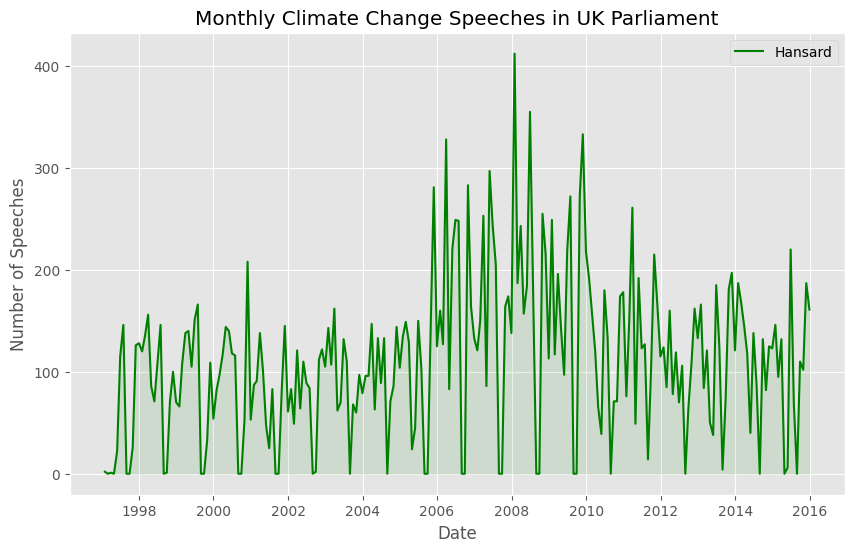

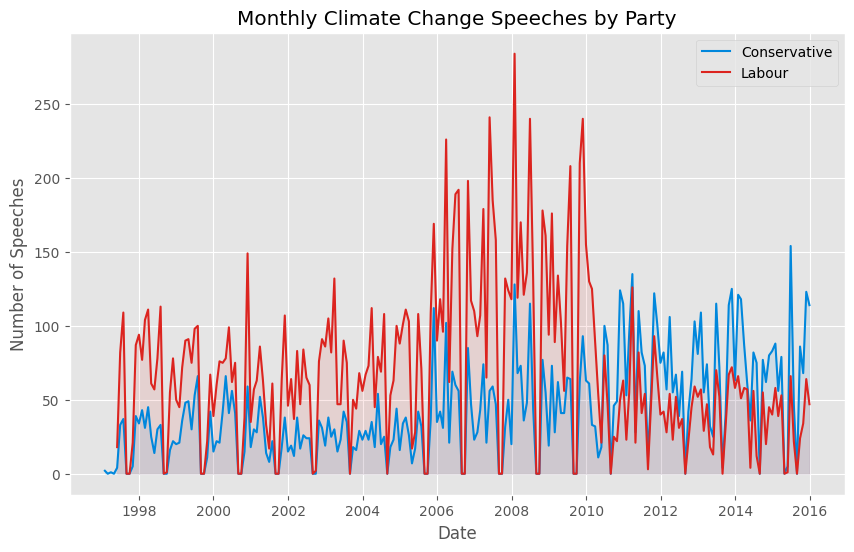

In [16]:
climate_hansard['speech_date'] = pd.to_datetime(climate_hansard['speech_date'])

conservative_speeches = climate_hansard[climate_hansard['speech_party']
                                        == 'Conservative']
labour_speeches = climate_hansard[climate_hansard['speech_party'] == 'Labour']

monthly_hansard_speeches = climate_hansard.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()

monthly_conservative_speeches = conservative_speeches.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()
monthly_labour_speeches = labour_speeches.groupby(pd.Grouper(
    key='speech_date', freq='M')).size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_hansard_speeches, label='Hansard', color='green')
plt.fill_between(monthly_hansard_speeches.index,
                 monthly_hansard_speeches, color='green', alpha=0.1)
plt.title('Monthly Climate Change Speeches in UK Parliament')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_conservative_speeches, label='Conservative',
         color=party_colours['Conservative'])
plt.plot(monthly_labour_speeches, label='Labour',
         color=party_colours['Labour'])
plt.fill_between(monthly_conservative_speeches.index,
                 monthly_conservative_speeches, color=party_colours['Conservative'], alpha=0.1)
plt.fill_between(monthly_labour_speeches.index,
                 monthly_labour_speeches, color=party_colours['Labour'], alpha=0.1)
plt.title('Monthly Climate Change Speeches by Party')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.legend()
plt.show()

## Static analysis


In [17]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Number of climate change speeches by political party


**Climate Congressional Record**


/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_18964/1531236806.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Number of Speeches',


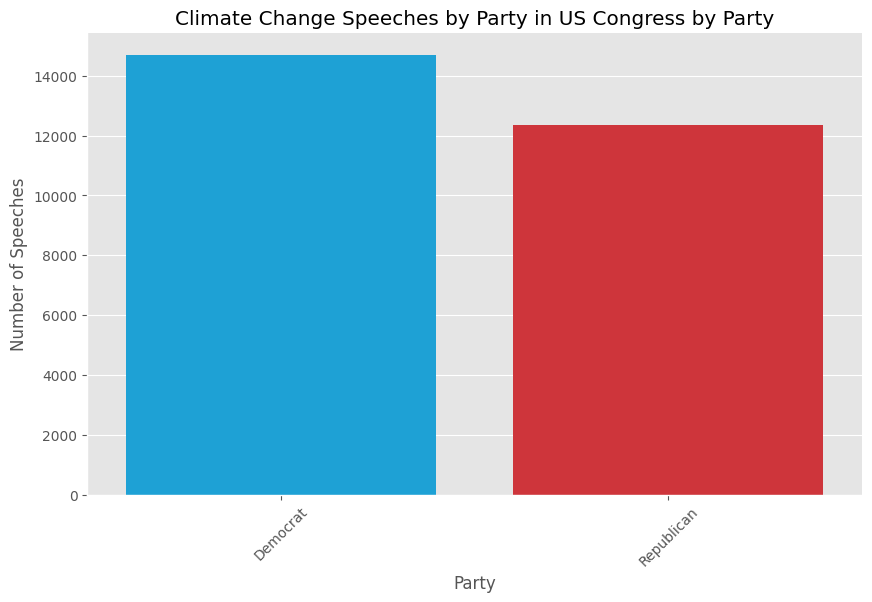

In [18]:
climate_congressional_record['party'] = climate_congressional_record['party'].replace(
    {'D': 'Democrat', 'R': 'Republican'})

congressional_record_party_speeches = climate_congressional_record['party'].value_counts(
).reset_index()
congressional_record_party_speeches.columns = ['Party', 'Number of Speeches']

color_dict = {'Democrat': os.getenv(
    'DEMOCRAT_BLUE'), 'Republican': party_colours['Republican']}

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Number of Speeches',
            data=congressional_record_party_speeches, palette=color_dict)
plt.title('Climate Change Speeches by Party in US Congress by Party')
plt.xlabel('Party')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
sns.despine()
plt.show()

**Climate Hansard**


/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_18964/2330832389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Party', y='Number of Speeches',


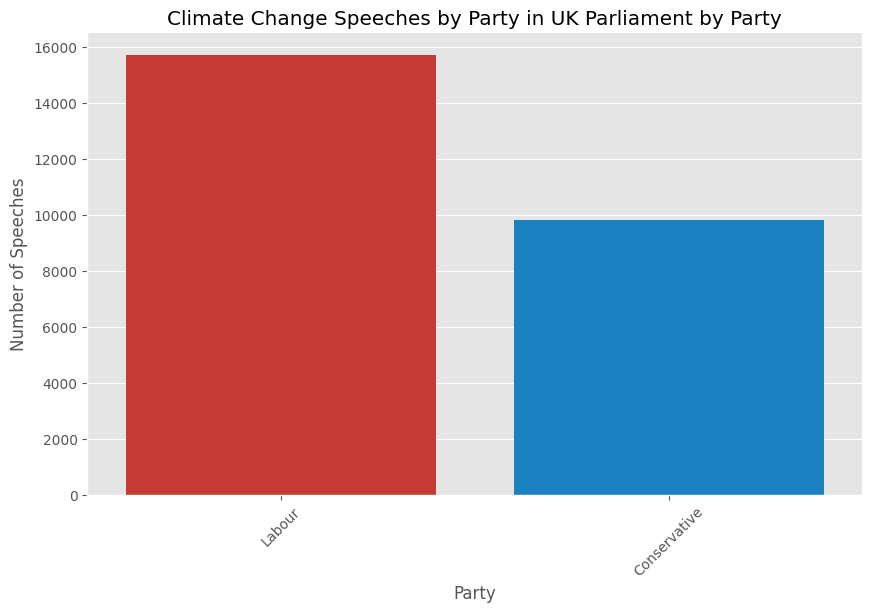

In [19]:
hansard_party_speeches = climate_hansard['speech_party'].value_counts(
).reset_index()
hansard_party_speeches.columns = ['Party', 'Number of Speeches']

color_dict = {'Conservative': os.getenv(
    'CONSERVATIVE_BLUE'), 'Labour': party_colours['Labour']}

plt.figure(figsize=(10, 6))
sns.barplot(x='Party', y='Number of Speeches',
            data=hansard_party_speeches, palette=color_dict)
plt.title('Climate Change Speeches by Party in UK Parliament by Party')
plt.xlabel('Party')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
sns.despine()
plt.show()